In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

In [2]:
# 데이터 불러오기
Floating_Population_df = pd.read_csv("Dataset/시군별유동인구데이터.csv")

print("data shape:", Floating_Population_df.shape)
Floating_Population_df.info()
Floating_Population_df.describe()

data shape: (85104, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85104 entries, 0 to 85103
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   년월               85104 non-null  int64  
 1   출발지(야간체류지) 시군코드  85104 non-null  int64  
 2   도착지 시군코드         85104 non-null  int64  
 3   10대남성 유입인구       85104 non-null  float64
 4   20대남성 유입인구       85104 non-null  float64
 5   30대남성 유입인구       85104 non-null  float64
 6   40대남성 유입인구       85104 non-null  float64
 7   50대남성 유입인구       85104 non-null  float64
 8   60대남성 유입인구       85104 non-null  float64
 9   70대남성 유입인구       85104 non-null  float64
 10  10대여성 유입인구       85104 non-null  float64
 11  20대여성 유입인구       85104 non-null  float64
 12  30대여성 유입인구       85104 non-null  float64
 13  40대여성 유입인구       85104 non-null  float64
 14  50대여성 유입인구       85104 non-null  float64
 15  60대여성 유입인구       85104 non-null  float64
 16  70대여성 유입인구       85104 non-null  f

,년월,출발지(야간체류지) 시군코드,도착지 시군코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구
count,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000,85104.000000
mean,202006.500024,37656.114848,41424.121075,215.452711,165.141044,221.515915,250.583858,215.889585,103.618840,58.476227,203.289620,139.888766,180.861623,204.166371,176.973420,93.359018,82.877010
std,3.452080,11667.943036,205.355521,3699.559404,2345.816823,2811.244828,3157.197889,2669.634409,1314.032403,886.498227,3482.195438,2119.335305,2676.983929,3128.439899,2596.732309,1381.142099,1337.824244
min,202001.000000,11110.000000,41110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202004.000000,28710.000000,41250.000000,0.140000,1.050000,1.110000,1.580000,1.930000,0.960000,0.220000,0.110000,0.380000,0.477500,0.500000,0.810000,0.590000,0.340000
50%,202006.000000,42730.000000,41410.000000,1.780000,4.790000,4.690000,6.020000,6.740000,3.260000,1.070000,1.520000,2.400000,2.480000,2.300000,3.020000,2.120000,1.660000
75%,202010.000000,46730.000000,41590.000000,10.960000,22.370000,29.730000,36.392500,34.720000,14.680000,4.650000,9.850000,14.170000,15.412500,13.990000,14.662500,8.420000,5.750000
max,202012.000000,50130.000000,41830.000000,133773.250000,92398.990000,102973.350000,107392.460000,91768.770000,42795.410000,29273.330000,124334.470000,83439.940000,97905.690000,109369.230000,88862.410000,45300.300000,45911.660000


In [3]:
# 데이터 전처리
Depart = Floating_Population_df['출발지(야간체류지) 시군코드']
Arrival = Floating_Population_df['도착지 시군코드']
Depart_unique = Depart.unique()
Arrival_unique = Arrival.unique()

print(Depart_unique)
print(Arrival_unique)


[11170 11200 11215 11230 11350 11380 11410 11440 11260 11290 11305 11320
 11110 11140 11530 11545 11560 11590 11620 11650 11680 11710 11740 26110
 26140 26170 26200 26230 26260 26290 26320 26350 26380 26410 11470 11500
 26440 26470 26500 28200 28237 28245 26530 26710 27110 27140 27170 27200
 27230 27260 27290 27710 28110 28140 28177 28185 41110 41130 41150 41170
 28260 28710 28720 29110 29140 29155 29170 29200 30110 30140 30170 30200
 30230 31110 31140 31170 31200 31710 36110 41190 41210 41480 41500 41550
 41220 41250 41270 41280 41290 41310 41360 41370 41390 41410 41430 41450
 41460 42760 42770 42780 42790 41570 41590 41610 41630 41650 41670 41800
 41820 41830 42110 42130 42150 42170 42190 42210 42230 42720 42730 42750
 42800 42810 42820 44150 44180 44200 44210 42830 43110 43130 43150 43720
 43730 43740 43745 43750 43760 43770 43800 44130 45740 45750 45770 45790
 45800 44230 44250 44270 44710 44760 44770 44790 44800 44810 44825 45110
 45130 45140 45180 45190 45210 45710 45720 45730 46

C:\Users\ggh99\anaconda3\envs\Practice_ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


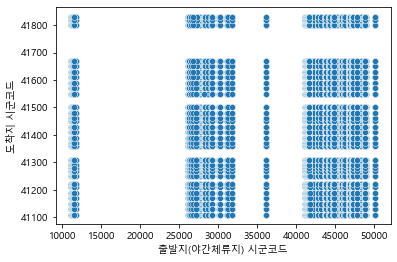

In [4]:
# plt.rcParams['font.family'] = 'AppleGothic' # Mac에서 실행할 경우, 주석 헤제
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows에서 실행할 경우, 주석 해제
sns.scatterplot(Depart, Arrival)
plt.show()

In [5]:
coordinates = pd.read_csv('Dataset/address/address_transform.utf-8.csv')
len(coordinates) # 확인용 출력

8

In [6]:
# folium을 이용하여 지도 핸들링
map_SK = folium.Map(location=[36.38, 127.51], zoom_start=6.5) # location: 남한 중심 좌표, zoom_start 수치가 클수록 확대

In [7]:
# Marker로 지도에 아이콘 표시
for lat, long, add in zip(coordinates['위도'], coordinates['경도'], coordinates['ADDR']):
    folium.Marker(
        location=[lat, long],
        popup=add,
        icon=folium.Icon(color='red', icon='city')

    ).add_to(map_SK)
map_SK
# 경기도 광주시 --> 광주광역시 수정

In [8]:
# PolyLine으로 동선 작성
center = [37.5980833, 126.535516] # Google Maps에 검색한 '경기도' 좌표
map_GK = folium.Map(location=center, zoom_start=10)

lines = coordinates[['위도', '경도']].values[1:9].tolist()

folium.PolyLine(
    locations=lines,
    tooltip='PolyLine'
).add_to(map_GK)

map_GK

In [9]:
# Heatmap을 map에 표시

# from folium.plugins import HeatMap
# HeatMap(count, radius=25).add_to(map_SK)

# map_SK

In [11]:
from folium.plugins import MarkerCluster # MarkerCluster를 이용하면 가까운 거리의 Marker들을 군집시켜서 해당 건수를 표현

def draw_map(df):
    # 지도 생성
    map_fn = folium.Map(location=[36.38, 127.51], zoom_start=6.5)
    # 리스트를 이용해 여러 행의 데이터를 위, 경도로 묶음
    locations = list(zip(df['위도'], df['경도']))
    locations_city = list(zip(coordinates['위도'], coordinates['경도']))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 도시 아이콘 표시
    icons = [folium.Icon(icon='city', color='red') for _ in range(len(locations_city))]
    # 역시 같은 원리로 아이콘을 클릭했을 때, popup 생성
    for add in df['ADDR']:
        folium.Marker(popup=add)

    # cluster 생성
    cluster = MarkerCluster(locations=locations, icons=icons)
    # 지도에 cluster 추가
    cluster.add_to(map_SK)

draw_map(coordinates)
map_SK
